In [12]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = make_moons(n_samples=200, random_state=5)

In [9]:
X = pd.DataFrame(data[0])
y = pd.Series(data[1])

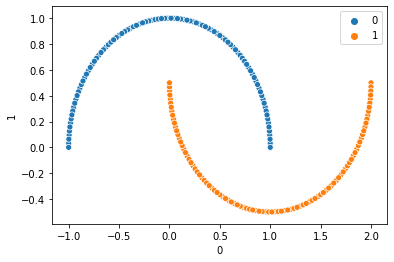

In [13]:
sns.scatterplot(X[0], X[1], hue = y)

In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [15]:
C_range = 10. ** np.arange(-3, 5)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv = 3, scoring='accuracy')

In [16]:
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.555631,0.089228,{'C': 0.001}
1,0.779587,0.076085,{'C': 0.01}
2,0.844490,0.076176,{'C': 0.1}
3,0.859490,0.073088,{'C': 1.0}
4,0.859641,0.052187,{'C': 10.0}
5,0.849691,0.050044,{'C': 100.0}
6,0.849691,0.050044,{'C': 1000.0}
7,0.849691,0.050044,{'C': 10000.0}


In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.8596411879993969
{'C': 10.0}


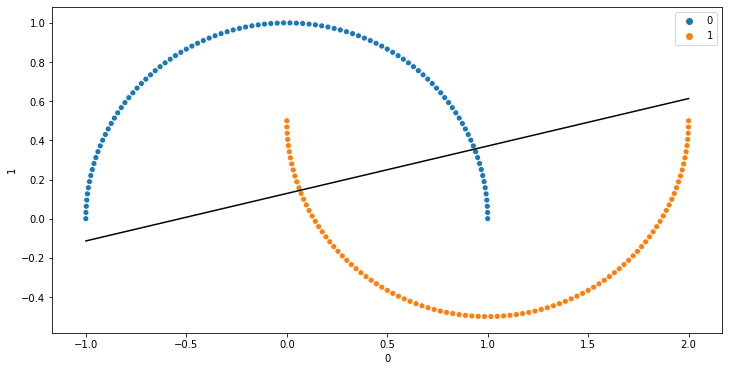

In [19]:
clf_final = svm.SVC(kernel = 'linear', C =10)
clf_final.fit(X, y)
w = clf_final.coef_[0]

a = -w[0] / w[1]
xx = np.linspace(X.loc[:, 0].min(), X.loc[:, 0].max())
yy = a * xx - clf_final.intercept_[0] / w[1]
plt.figure(figsize = (12, 6))
plt.plot(xx, yy, c = 'k')
sns.scatterplot(X.loc[:, 0], X.loc[:, 1], hue = y)

As we can see the above plot is not linearly seperable, that is why linear svm fails to generalize properly.

In [23]:
C_range = 10. ** np.arange(-3, 4)
gamma_range = 10. ** np.arange(-4, 3)

In [24]:
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(), param_grid, cv = 3, scoring='accuracy')
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.555631,0.089228,"{'C': 0.001, 'gamma': 0.0001}"
1,0.555631,0.089228,"{'C': 0.001, 'gamma': 0.001}"
2,0.555631,0.089228,"{'C': 0.001, 'gamma': 0.01}"
3,0.555631,0.089228,"{'C': 0.001, 'gamma': 0.1}"
4,0.580883,0.124940,"{'C': 0.001, 'gamma': 1.0}"
5,0.661692,0.239220,"{'C': 0.001, 'gamma': 10.0}"
6,0.661692,0.239220,"{'C': 0.001, 'gamma': 100.0}"
7,0.555631,0.089228,"{'C': 0.01, 'gamma': 0.0001}"
8,0.555631,0.089228,"{'C': 0.01, 'gamma': 0.001}"
9,0.555631,0.089228,"{'C': 0.01, 'gamma': 0.01}"


In [22]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'C': 0.1, 'gamma': 10.0}
